In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import zipfile

zip_path = r'../Data.zip'  # Adjust based on actual location
extract_to_path = '../project_data'

# Extract files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Extraction complete.")

Extraction complete.


In [4]:
df = pd.read_csv('../project_data/Data/train_data.csv')

C:\Users\joaom\AppData\Local\Temp\ipykernel_4720\2564130253.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../project_data/Data/train_data.csv')


In [5]:
df.head(3).T

,0,1,2
Accident Date,2019-12-30,2019-08-30,2019-12-06
Age at Injury,31.0,46.0,40.0
Alternative Dispute Resolution,N,N,N
Assembly Date,2020-01-01,2020-01-01,2020-01-01
Attorney/Representative,N,Y,N
Average Weekly Wage,0.0,1745.93,1434.8
Birth Year,1988.0,1973.0,1979.0
C-2 Date,2019-12-31,2020-01-01,2020-01-01
C-3 Date,NaN,2020-01-14,NaN
Carrier Name,NEW HAMPSHIRE INSURANCE CO,ZURICH AMERICAN INSURANCE CO,INDEMNITY INSURANCE CO OF


In [6]:
print(df.isnull().sum())

Accident Date                          23134
Age at Injury                          19445
Alternative Dispute Resolution         19445
Assembly Date                              0
Attorney/Representative                19445
Average Weekly Wage                    48096
Birth Year                             48523
C-2 Date                               34005
C-3 Date                              406226
Carrier Name                           19445
Carrier Type                           19445
Claim Identifier                           0
Claim Injury Type                      19445
County of Injury                       19445
COVID-19 Indicator                     19445
District Name                          19445
First Hearing Date                    442673
Gender                                 19445
IME-4 Count                           460668
Industry Code                          29403
Industry Code Description              29403
Medical Fee Region                     19445
OIICS Natu

In [7]:
# Set the threshold for missing values (e.g., more than 50% missing)
threshold = 0.5

# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean()

# Filter columns that have more than the threshold of missing values
high_missing_columns = missing_percentage[missing_percentage > threshold]

# Display the columns with their missing percentage
print(high_missing_columns)


C-3 Date                              0.684492
First Hearing Date                    0.745905
IME-4 Count                           0.776227
OIICS Nature of Injury Description    1.000000
dtype: float64


In [8]:
len(df.columns)

33

In [9]:
len(df)

593471

In [10]:
print(df.dtypes)

Accident Date                          object
Age at Injury                         float64
Alternative Dispute Resolution         object
Assembly Date                          object
Attorney/Representative                object
Average Weekly Wage                   float64
Birth Year                            float64
C-2 Date                               object
C-3 Date                               object
Carrier Name                           object
Carrier Type                           object
Claim Identifier                        int64
Claim Injury Type                      object
County of Injury                       object
COVID-19 Indicator                     object
District Name                          object
First Hearing Date                     object
Gender                                 object
IME-4 Count                           float64
Industry Code                         float64
Industry Code Description              object
Medical Fee Region                

In [11]:
#Converting Date Columns
# Convert object columns to datetime format
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']
df[date_columns] = df[date_columns].apply(pd.to_datetime, errors='coerce')


In [12]:
# Convert object columns to category
categorical_columns = ['Alternative Dispute Resolution', 'Carrier Name', 'Carrier Type', 
                       'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
                       'District Name', 'Gender', 'WCB Decision', 'Medical Fee Region']

df[categorical_columns] = df[categorical_columns].astype('category')


In [13]:
# Example: Convert numerical columns stored as objects to float (if necessary)
df['Average Weekly Wage'] = pd.to_numeric(df['Average Weekly Wage'], errors='coerce')


In [14]:
print(df.dtypes)

Accident Date                         datetime64[ns]
Age at Injury                                float64
Alternative Dispute Resolution              category
Assembly Date                         datetime64[ns]
Attorney/Representative                       object
Average Weekly Wage                          float64
Birth Year                                   float64
C-2 Date                              datetime64[ns]
C-3 Date                              datetime64[ns]
Carrier Name                                category
Carrier Type                                category
Claim Identifier                               int64
Claim Injury Type                           category
County of Injury                            category
COVID-19 Indicator                          category
District Name                               category
First Hearing Date                    datetime64[ns]
Gender                                      category
IME-4 Count                                  f

In [15]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Check the numerical columns
print(numerical_df.columns)

Index(['Age at Injury', 'Average Weekly Wage', 'Birth Year',
       'Claim Identifier', 'IME-4 Count', 'Industry Code',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Agreement Reached', 'Number of Dependents'],
      dtype='object')


In [16]:
# Calculate correlation matrix
corr_matrix = numerical_df.corr()

# Display the correlation matrix
print(corr_matrix)


                                    Age at Injury  Average Weekly Wage  \
Age at Injury                            1.000000             0.016196   
Average Weekly Wage                      0.016196             1.000000   
Birth Year                               0.012615             0.001928   
Claim Identifier                        -0.010944            -0.003451   
IME-4 Count                              0.067650            -0.008122   
Industry Code                            0.001631             0.010695   
OIICS Nature of Injury Description            NaN                  NaN   
WCIO Cause of Injury Code               -0.026822             0.002714   
WCIO Nature of Injury Code               0.023150             0.006149   
WCIO Part Of Body Code                   0.007608            -0.002199   
Agreement Reached                        0.019079             0.005610   
Number of Dependents                     0.000461            -0.001098   

                                    B

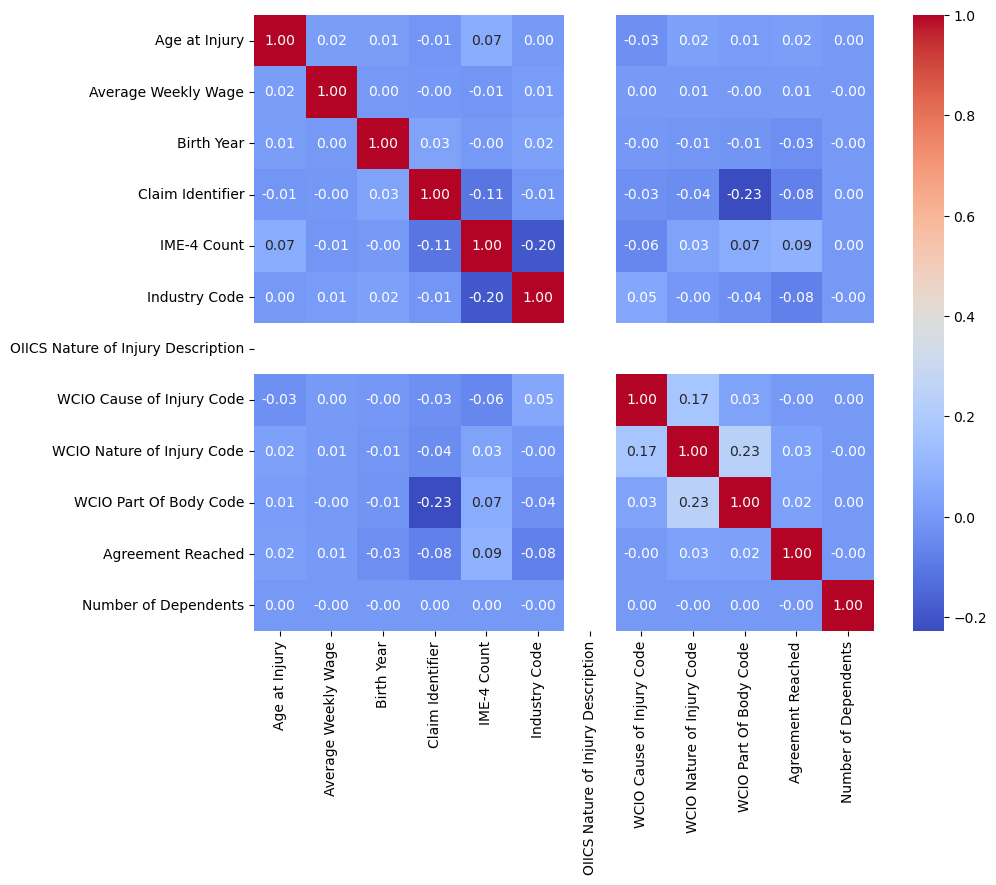

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


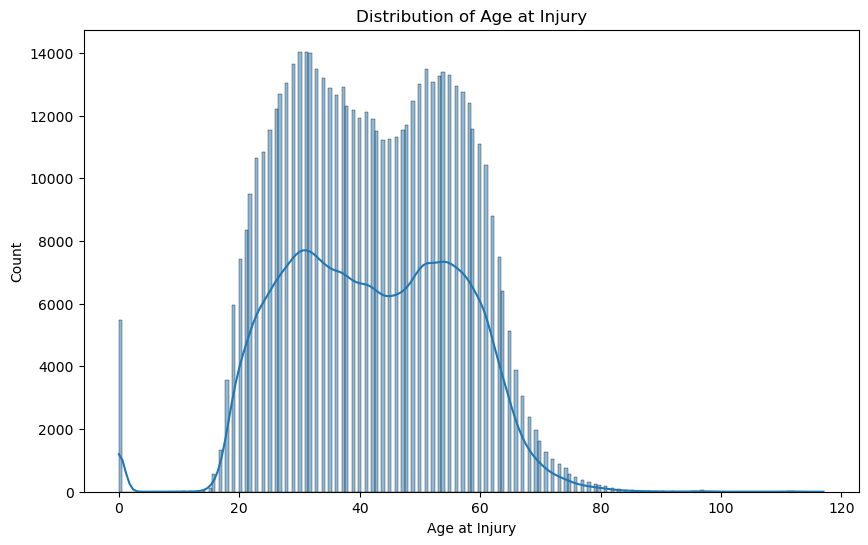

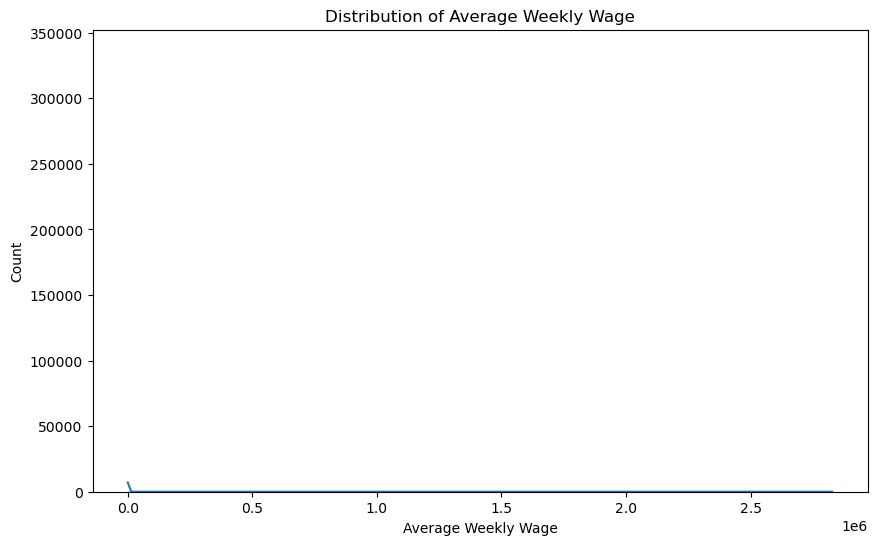

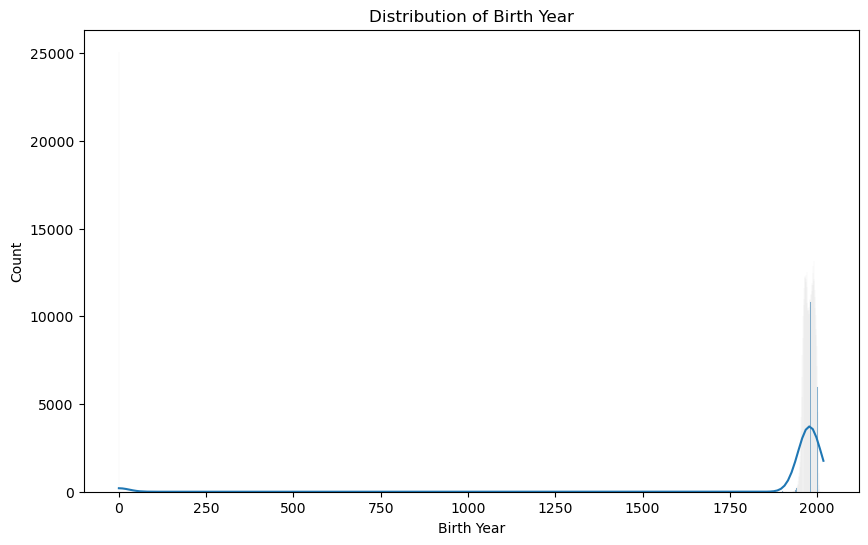

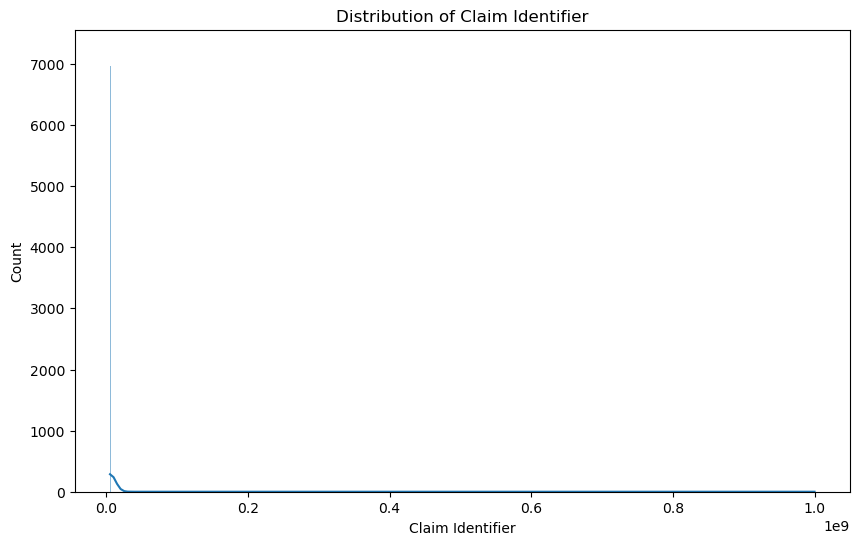

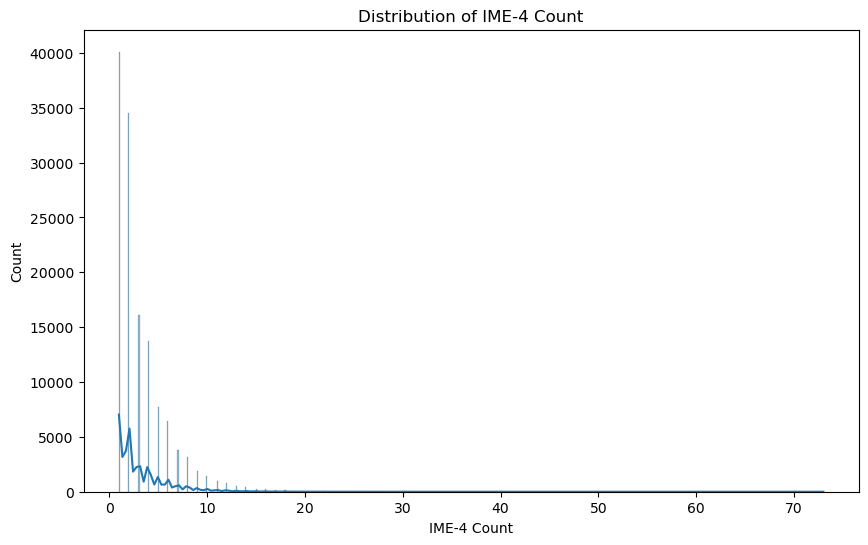

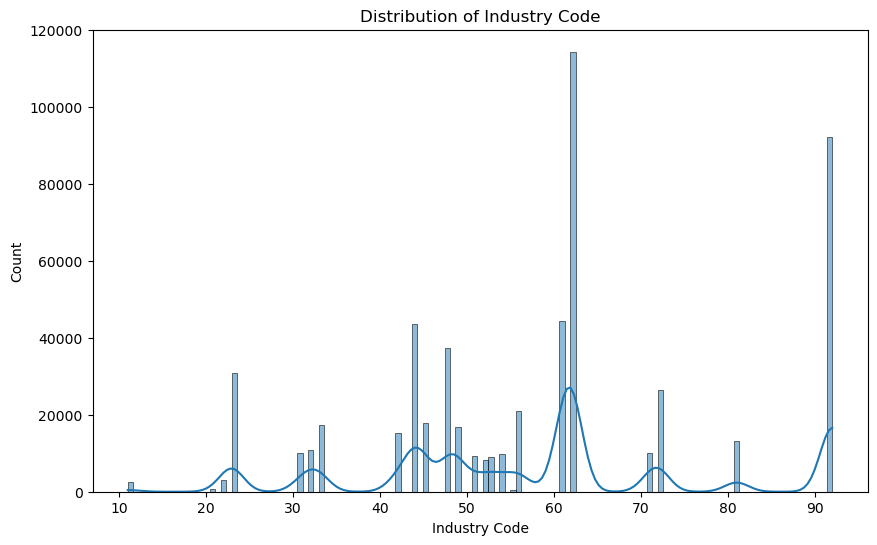

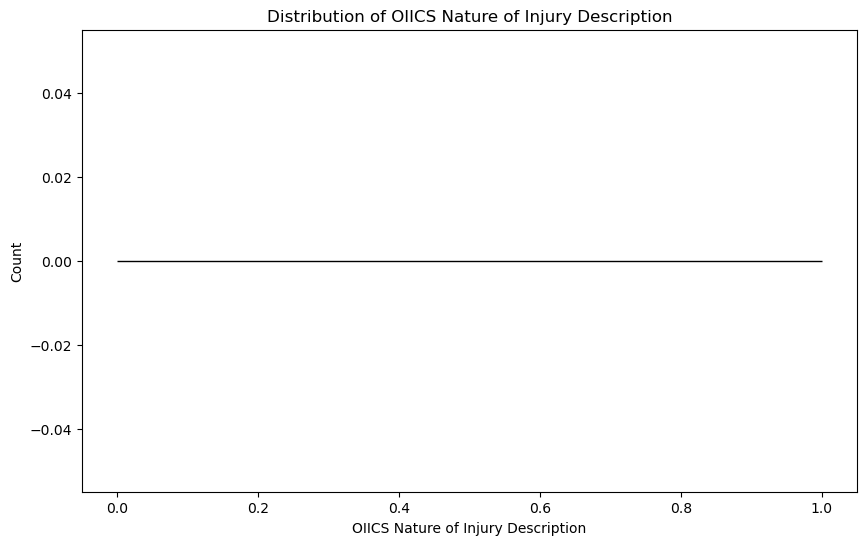

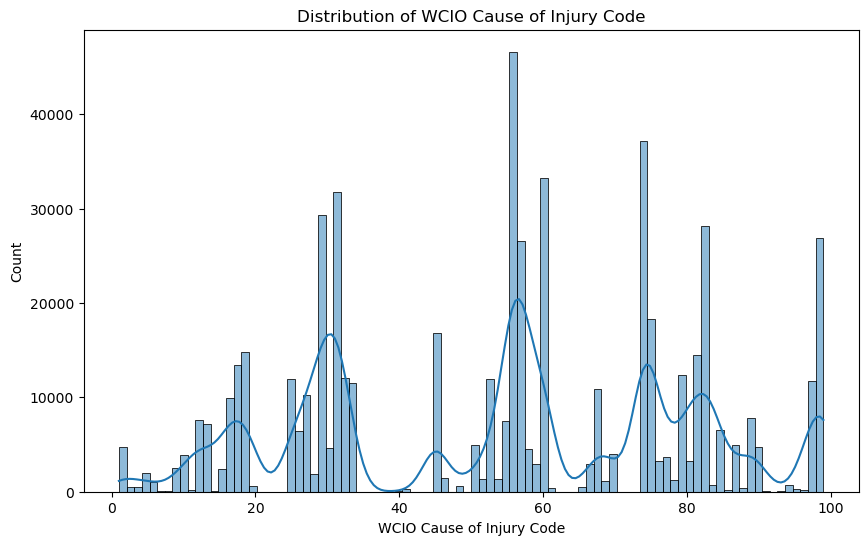

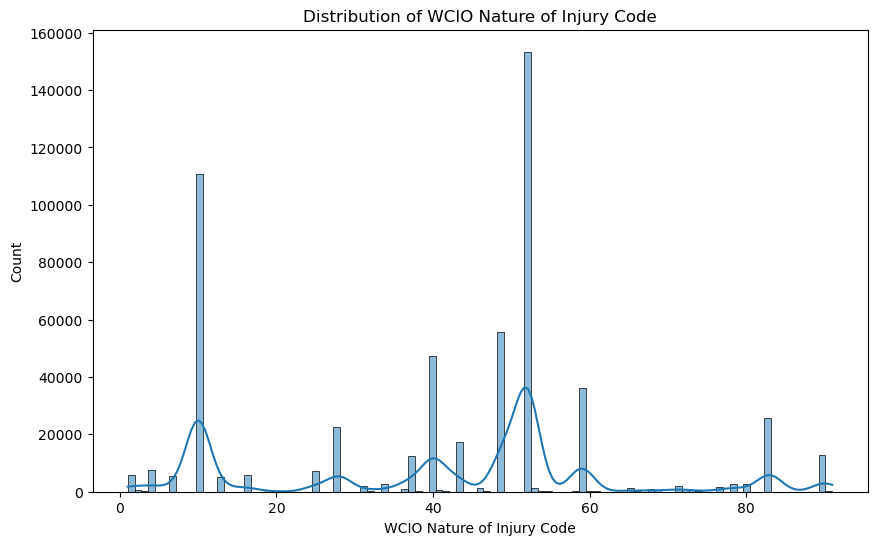

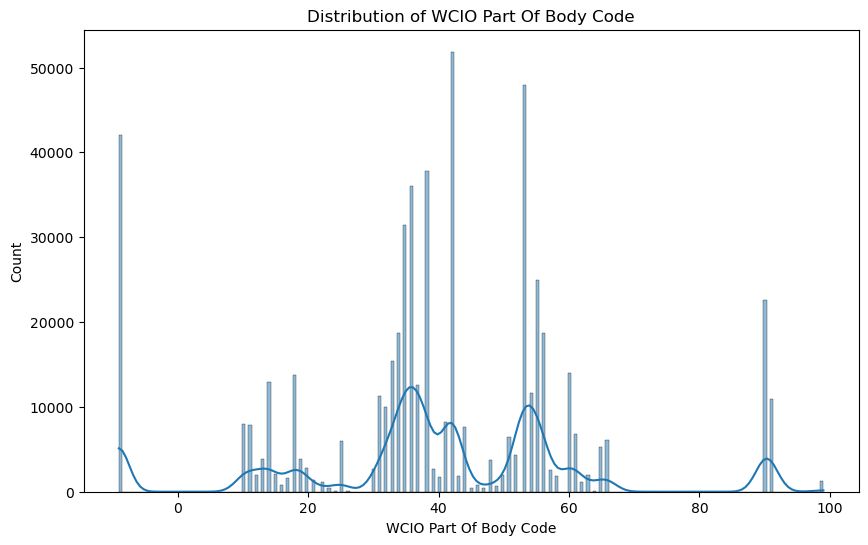

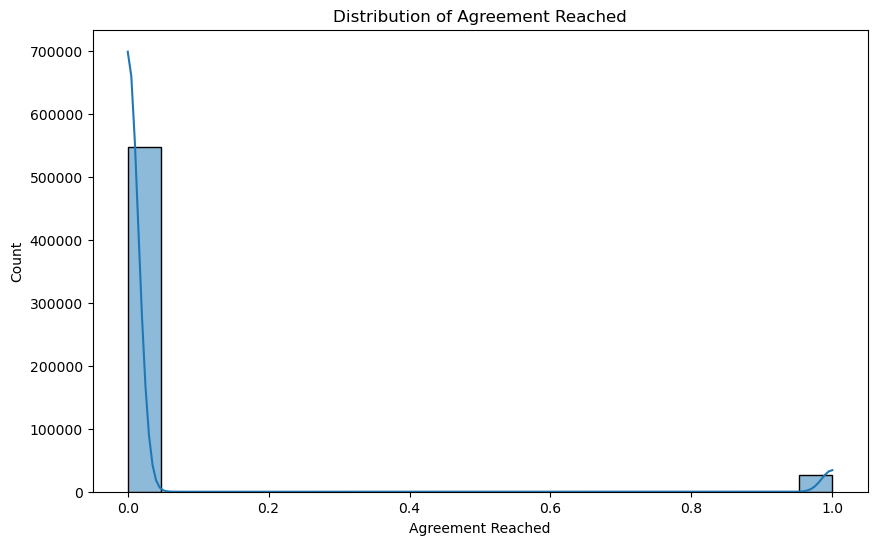

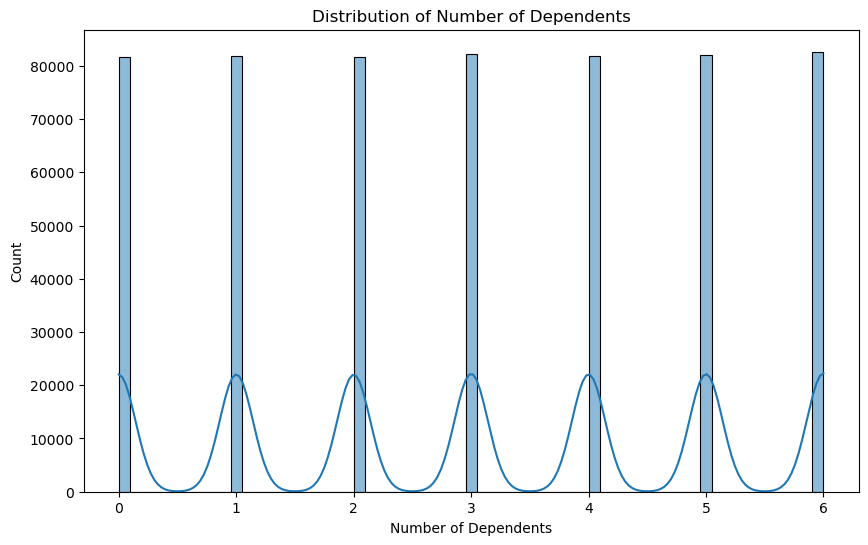

In [18]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot distribution for all numerical columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


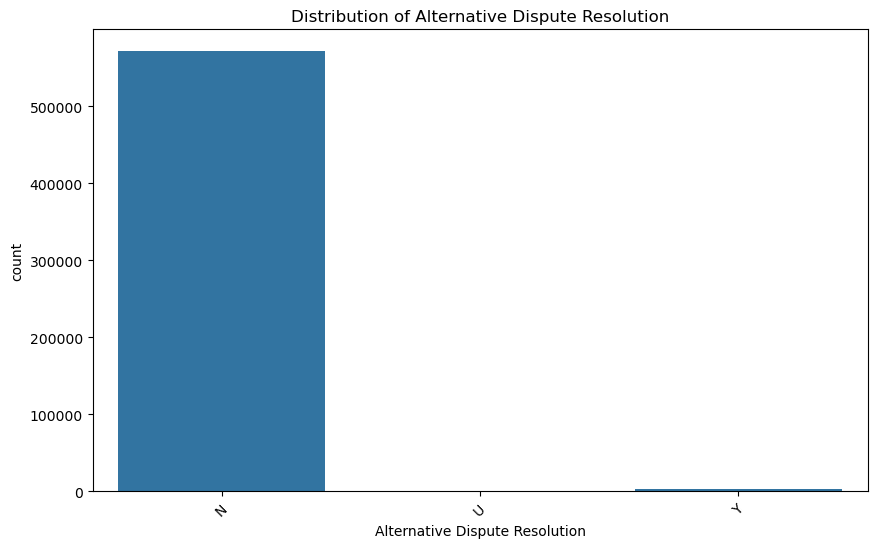

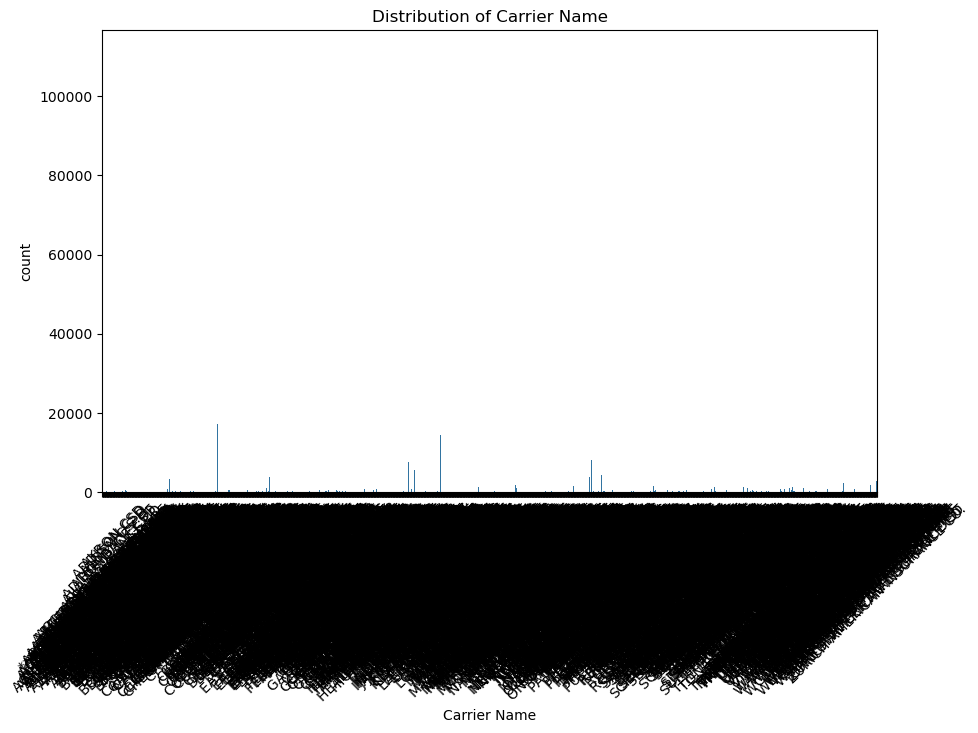

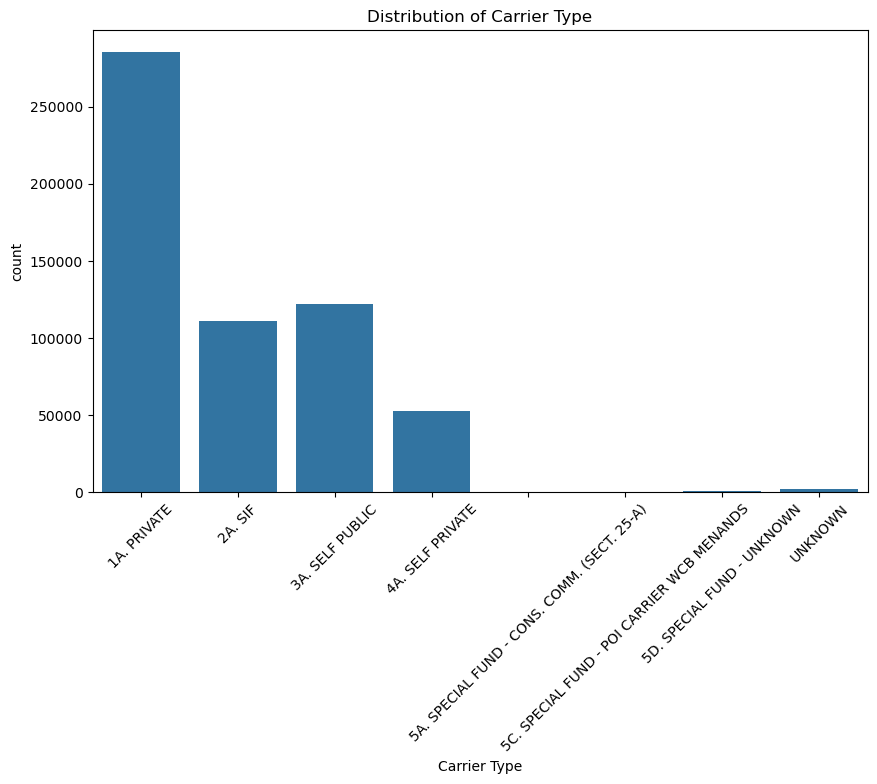

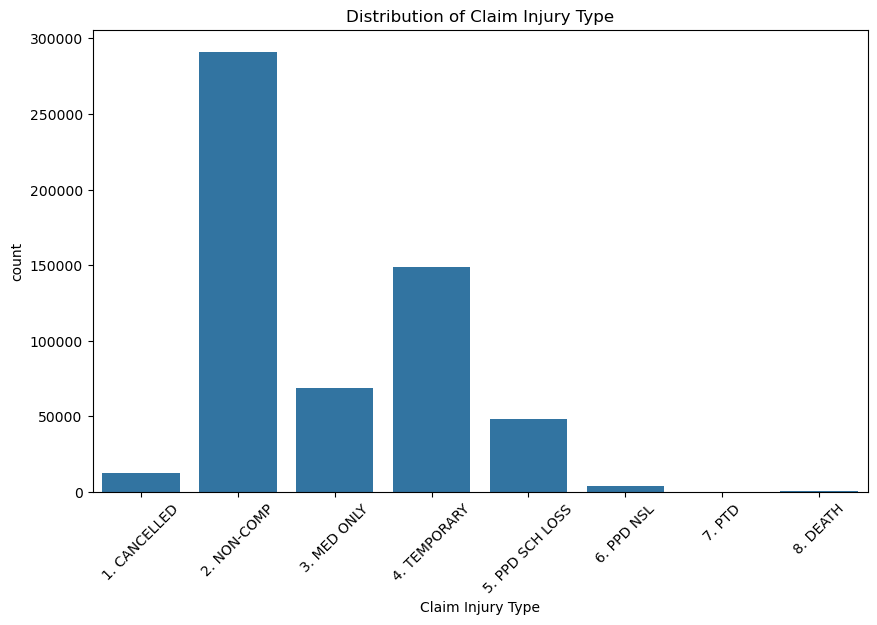

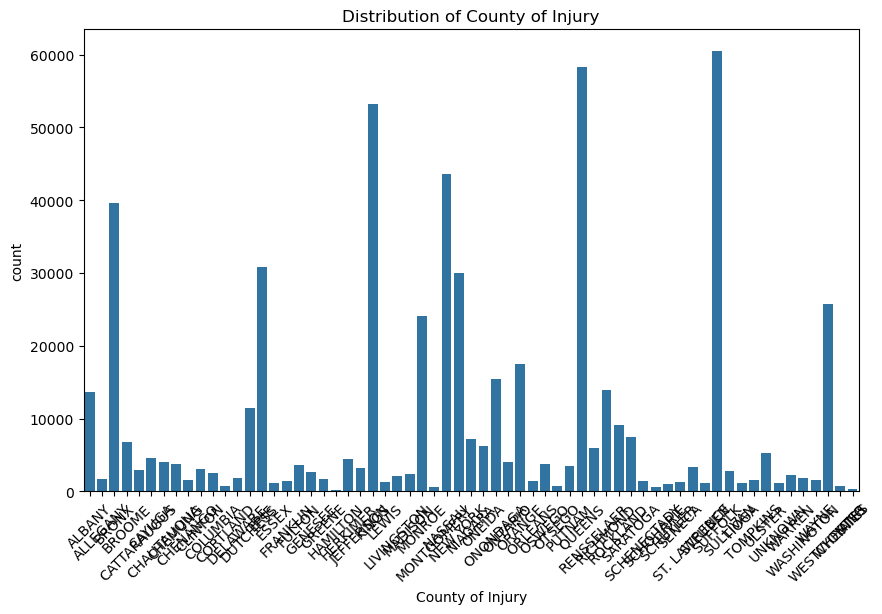

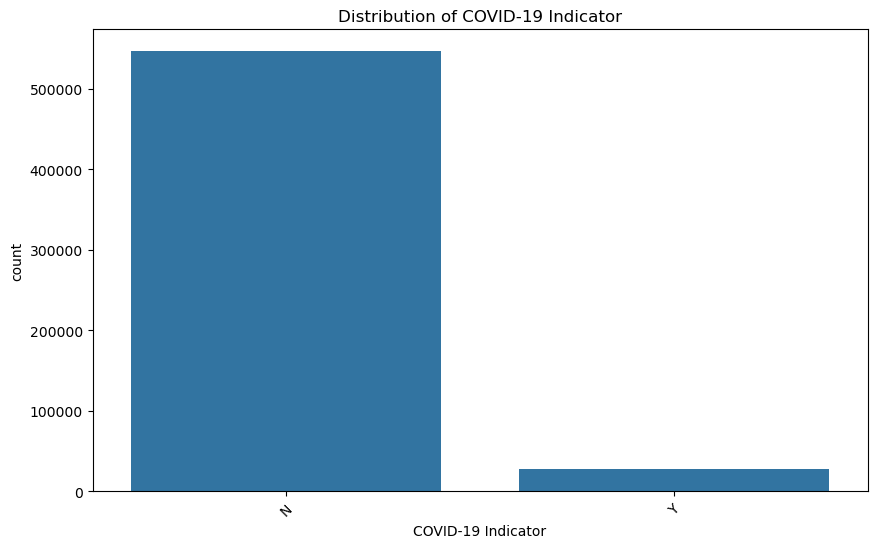

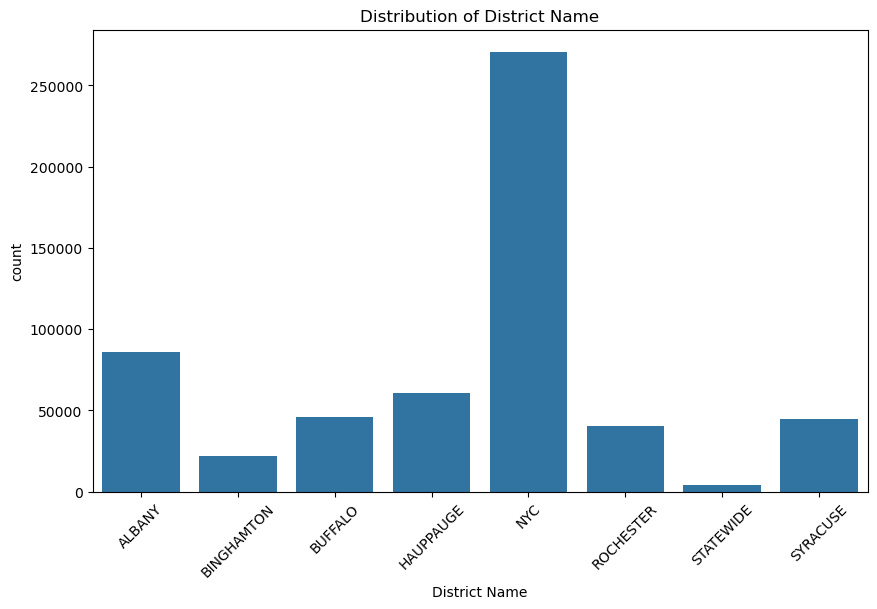

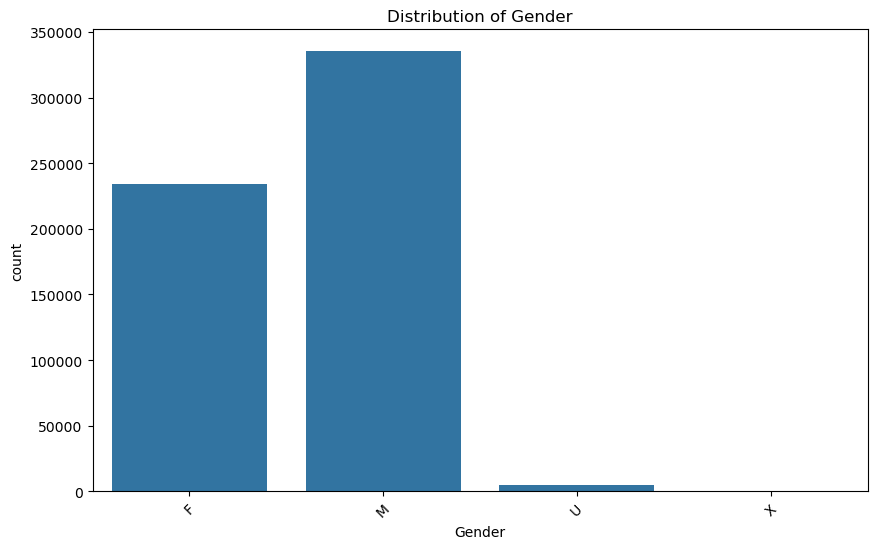

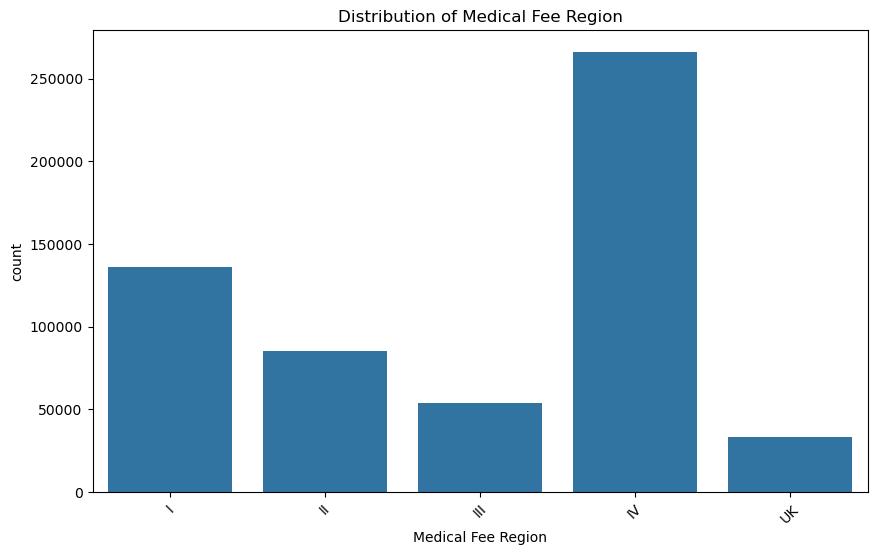

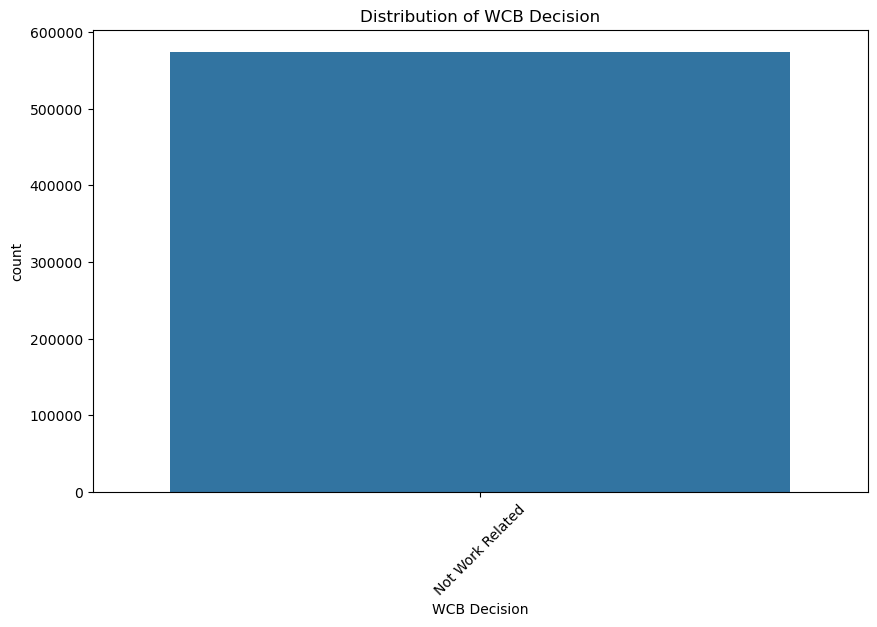

In [19]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['category']).columns

# Plot distribution for all categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


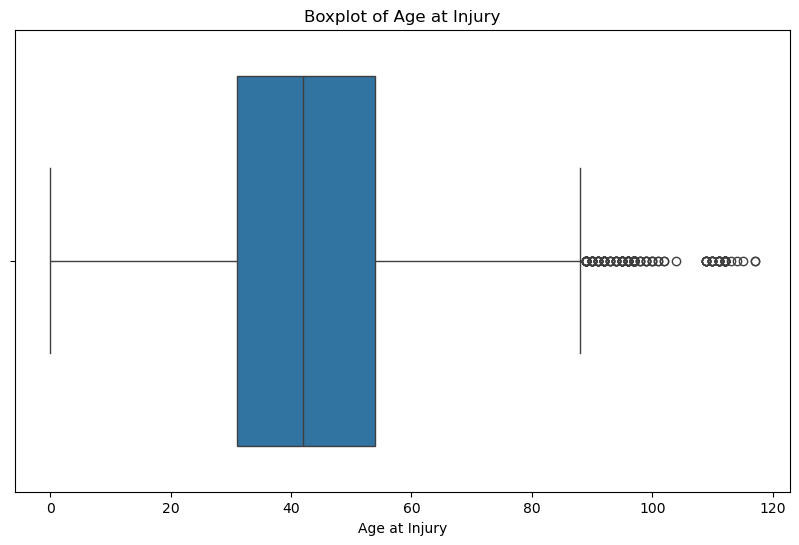

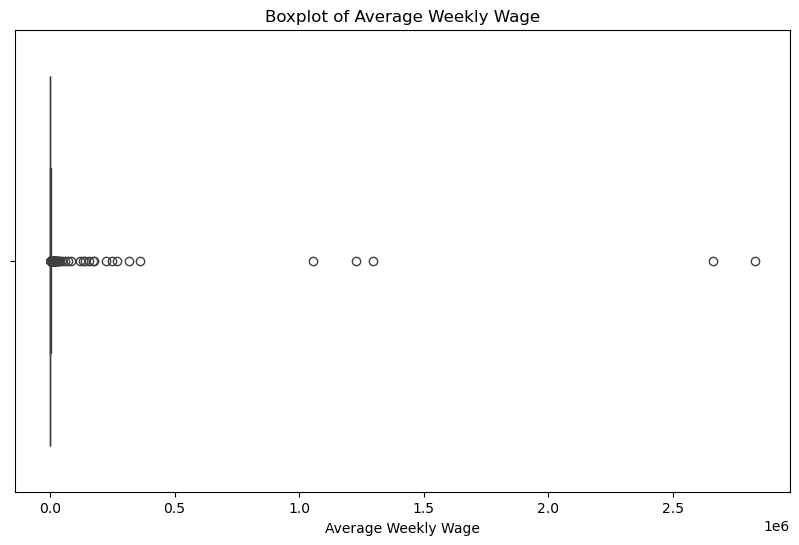

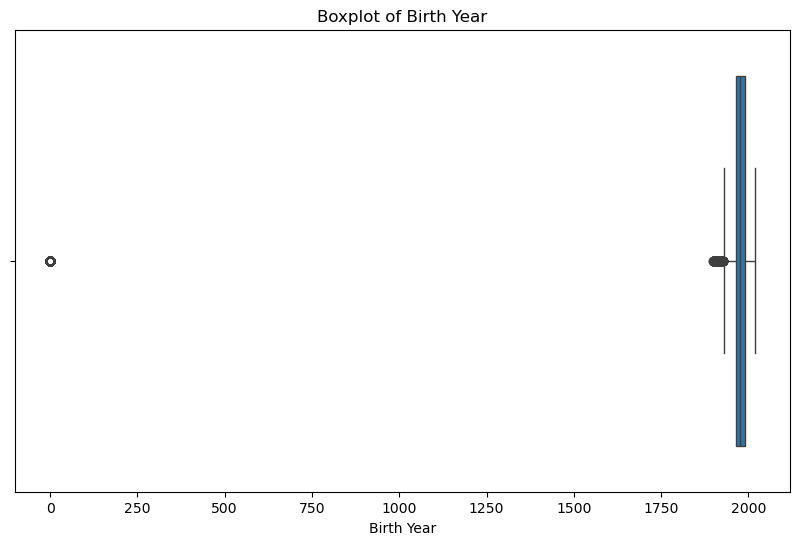

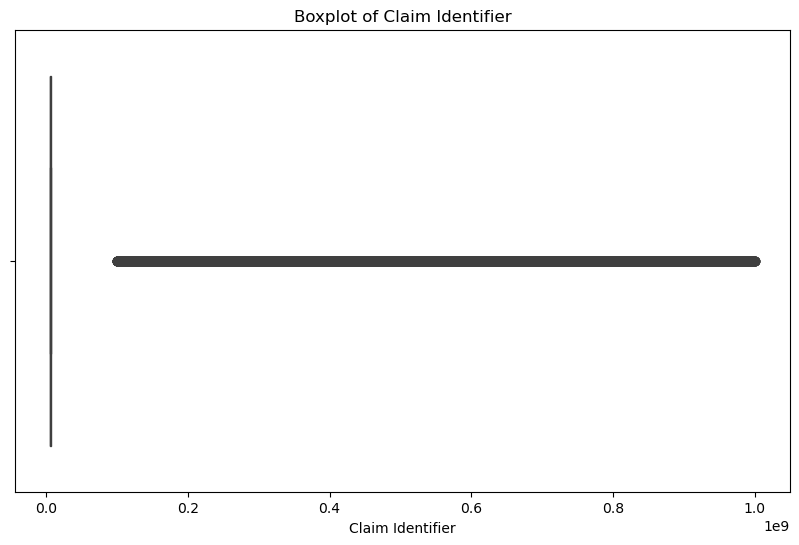

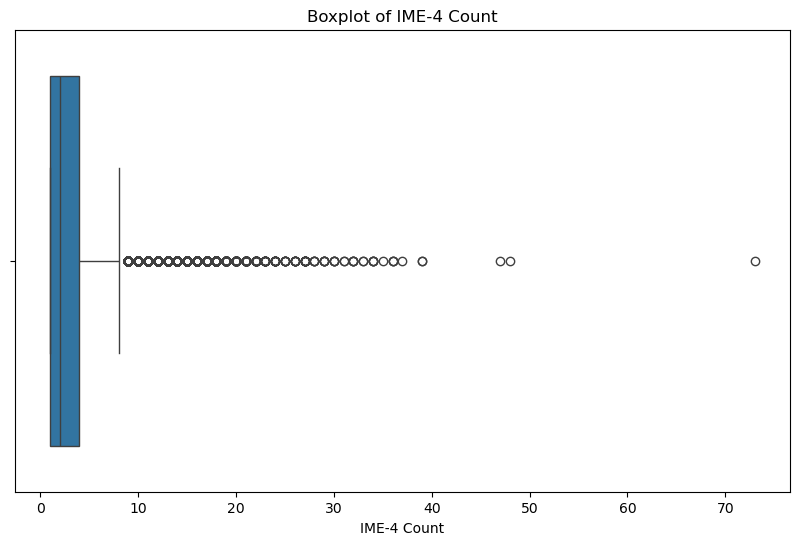

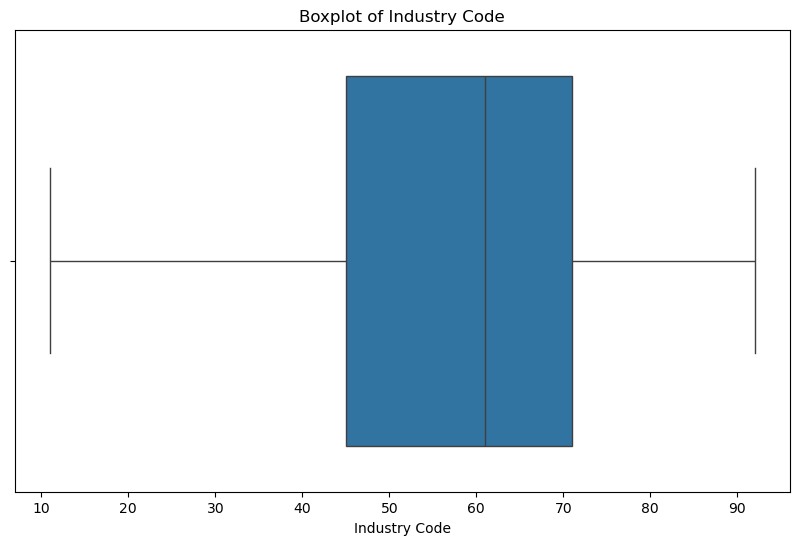

ValueError: List of boxplot statistics and `positions` values must have same the length

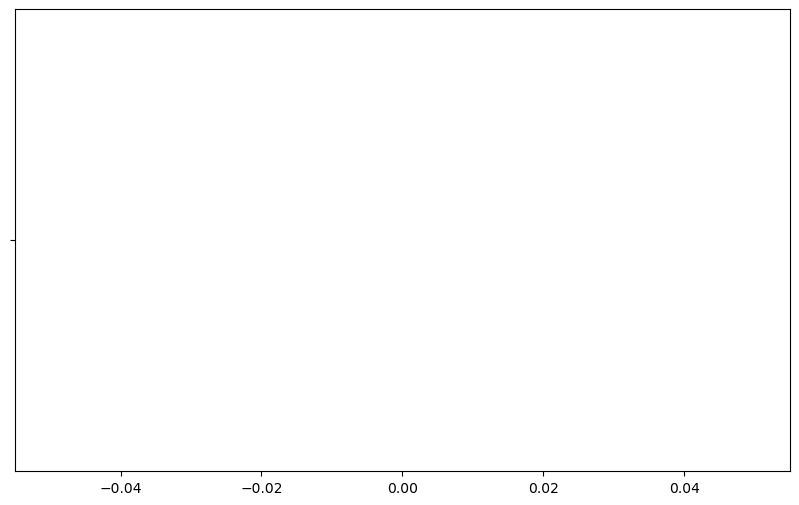

In [20]:
# Select numerical columns only
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create boxplots for all numerical columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


# Exploring text features
TEXT: Carrier Name, County of Injury, Carrier Type, Claim Injury Type, Industry Code Description, WCIO Cause of Injury Description, WCIO Nature of Injury Description, WCIO Part Of Body Description, 

Clean the text - removing special characters and numbers

In [36]:
import re
text_features = [
    'Carrier Name', 'County of Injury', 'Carrier Type', 'Claim Injury Type', 
    'Industry Code Description', 'WCIO Cause of Injury Description', 
    'WCIO Nature of Injury Description', 'WCIO Part Of Body Description'
]

for feature in text_features:
    # Clean each entry in the column to remove special characters and numbers
    df[feature] = df[feature].astype(str).apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
    

Value_counts() to see the possible values for each categorical feature

In [37]:
# Dictionary to store value_counts for each feature
value_counts_dict = {}

# Loop over each text feature and calculate value_counts()
for feature in text_features:
    # Calculate the value counts for the column and store it in the dictionary
    value_counts_dict[feature] = df[feature].value_counts()

# Display value_counts for each text feature
for feature, counts in value_counts_dict.items():
    print(f"\nValue Counts for '{feature}':")
    print(counts)


Value Counts for 'Carrier Name':
STATE INSURANCE FUND            111144
POLICE FIRE SANITATION           21602
nan                              19445
AMERICAN ZURICH INSURANCE CO     17540
CHARTER OAK FIRE INS CO          17176
                                 ...  
TRAVELERS CASUALTY COMPANY           1
E I DU PONT DE NEMOURS  CO           1
CITY OF BINGHAMTON                   1
SPECIAL TRADES CONTRACTING           1
HERMONDEKALB CENTRAL                 1
Name: Carrier Name, Length: 1988, dtype: int64

Value Counts for 'County of Injury':
SUFFOLK       60430
QUEENS        58333
KINGS         53207
NASSAU        43580
BRONX         39618
              ...  
WYOMING         760
MONTGOMERY      613
SCHOHARIE       558
YATES           396
HAMILTON        134
Name: County of Injury, Length: 64, dtype: int64

Value Counts for 'Carrier Type':
A PRIVATE                                  285368
A SELF PUBLIC                              121920
A SIF                                      111144

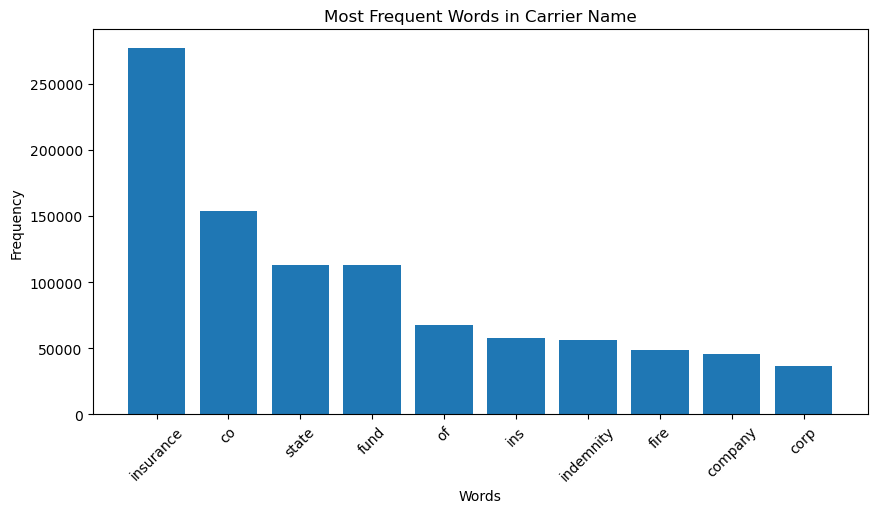

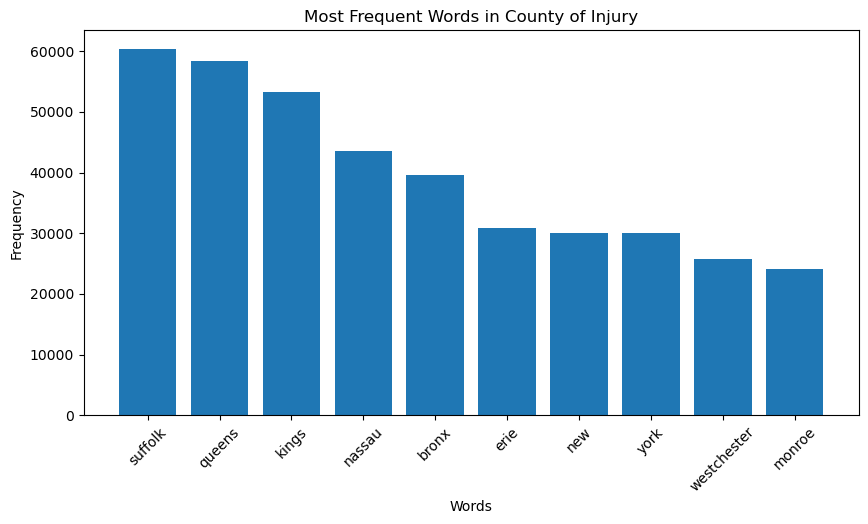

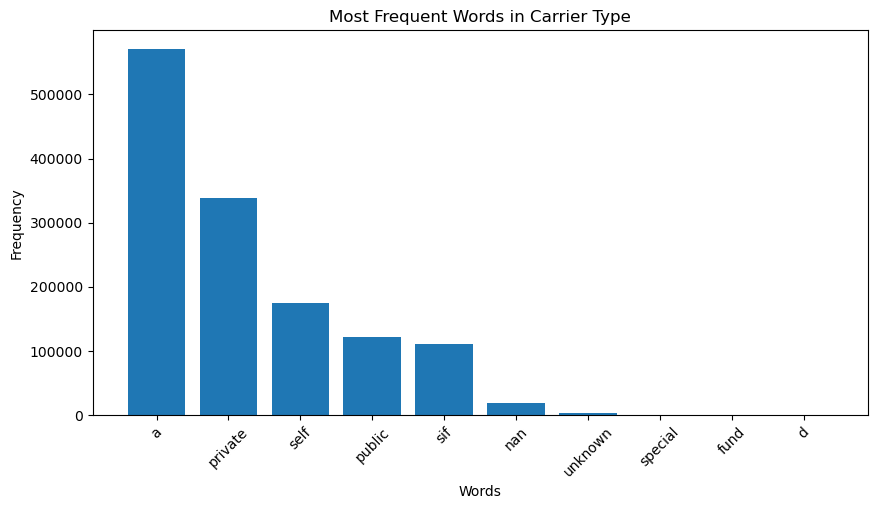

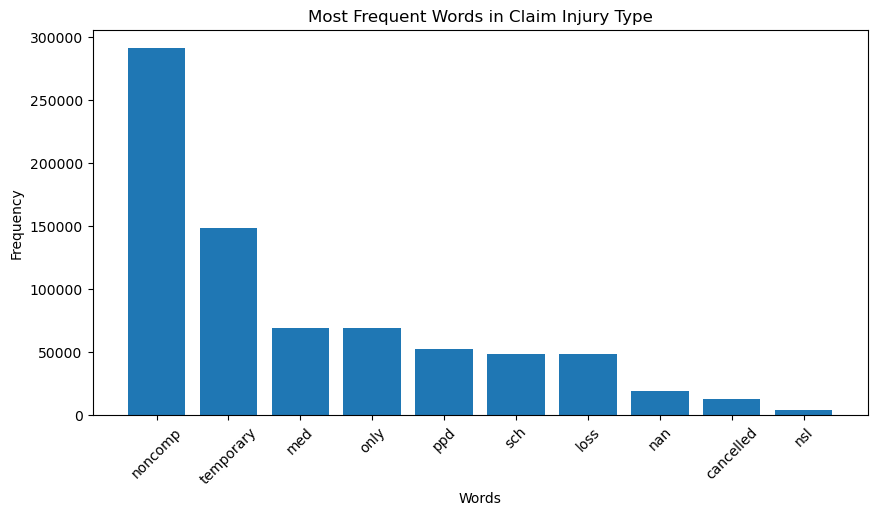

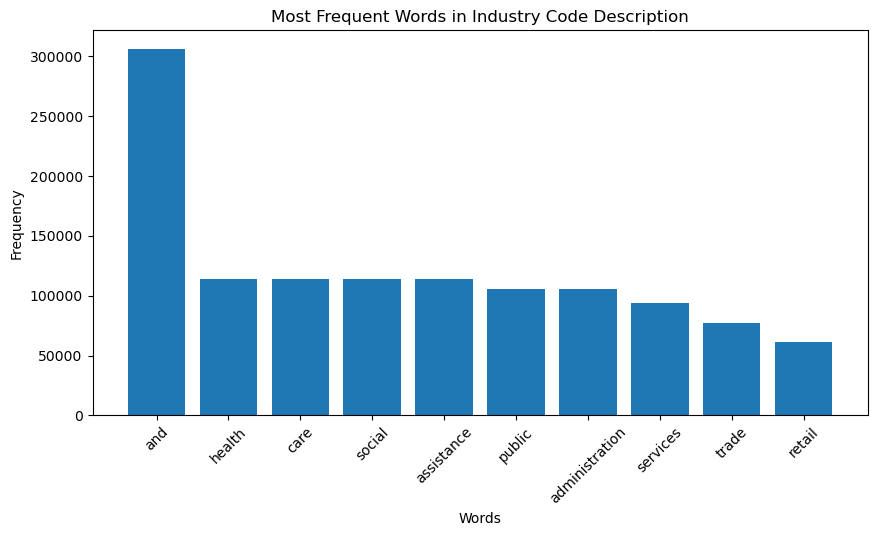

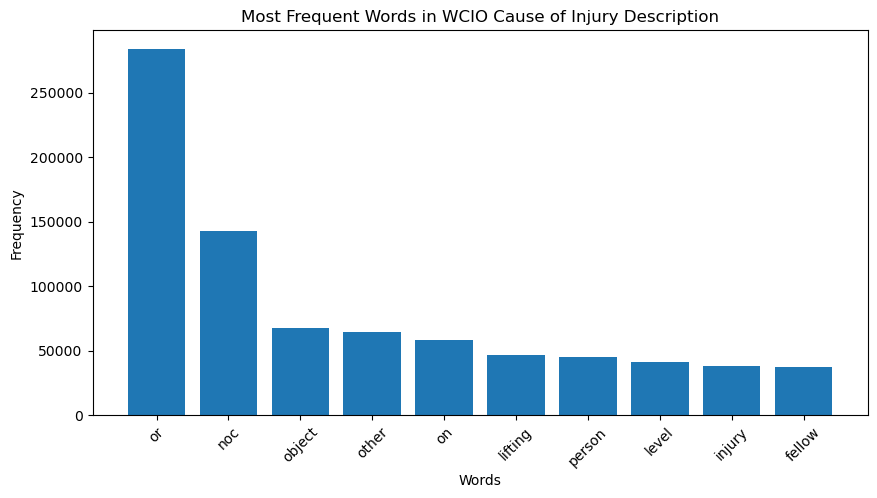

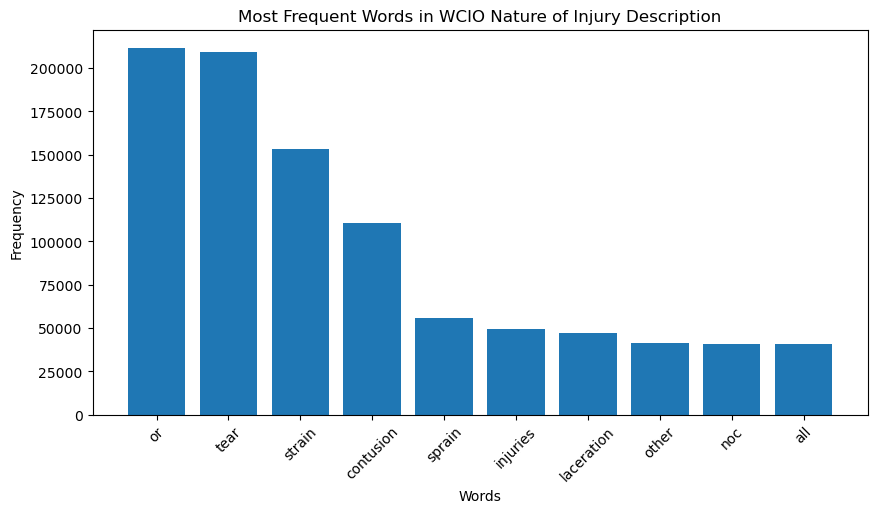

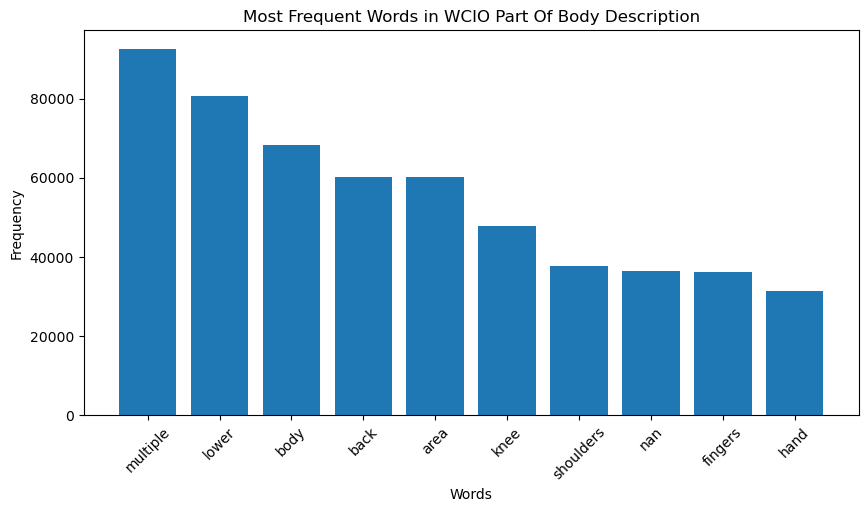

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

# Dictionary to store the word frequencies for each text feature
word_frequencies = {}

# Process each text feature
for feature in text_features:
    # Join all text in the column into a single string, lowercased
    all_text = ' '.join(df[feature].dropna().astype(str).str.lower())
    # Use regex to extract words
    words = re.findall(r'\b\w+\b', all_text)
    # Count word frequencies
    word_counts = Counter(words)
    # Get the 10 most common words for this feature
    most_common_words = word_counts.most_common(10)
    word_frequencies[feature] = most_common_words

# Plotting
for feature, words in word_frequencies.items():
    words, counts = zip(*words)  # Separate words and counts for plotting
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.title(f'Most Frequent Words in {feature}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()